In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def grid(n,prob):
    """
    Construct a grid with dimension n with probability prob
    """
    a = np.zeros((n,n), dtype= int)
    values = [0,1]
    prob = prob
    for i in range(len(a)):
        for j in range(len(a[i])):
            a[i,j] = np.random.choice(values,p= [prob, 1-prob] )
    return a

In [5]:
def monte_carlo(samples,n, prob):
    """
    samples: number of samples (int)
    n: size of matrix  (odd int)
    prob: probability of getting 1 or 0 (0<=prob<=1)
    """
    count = 0.
    for i in range(samples):
        b = grid(n,prob)
        #Mark where to start
        b[(n-1)/2][(n-1)/2] = 2
        #Search and replace
        a = True
        plt.imshow(b)
        plt.show()
        q = True
        while a == True:
            for (i,j),v in np.ndenumerate(b):
            #Search on the position matrix where is 1
                if b[i,j] == 2:                    
                    #exclude borders:
                    if i+1 in range(n):
                        if i-1 in range(n):
                            if j+1 in range(n):
                                if j-1 in range(n):
                                    #If blocked end program:
                                    if b[i+1,j] != 0:
                                        if b[i-1,j] != 0:
                                            if b[i,j+1] != 0:
                                                if b[i,j-1] != 0:                                                    
                                                    a = False
                                                                                                        
                                    #Write in the bottom cell
                                    if b[i+1,j] == 0:
                                        b[i+1,j] = 2
                                        
                                    #Write in the right cell
                                    if b[i,j+1] == 0:
                                        b[i,j+1] = 2
                                        
                                    #write in the top cell
                                    if b[i-1,j] == 0:
                                        b[i-1,j] = 2                                        
                                        
                                    #write in the left cell
                                    if b[i,j-1] == 0:
                                        b[i,j-1] = 2
                                else:                                    
                                    count +=1
                                    a = False
                                                                        
                            else:
                                count +=1
                                a = False
                                
                        else:                           
                            count +=1
                            a = False
                            
                    else:                                                                    
                        count +=1
                        a = False
                        
                                                    
        plt.imshow(b)
        plt.show()
        print(count)   
    return(count/samples)

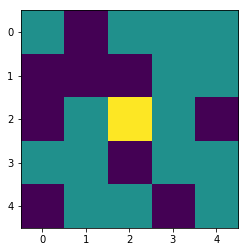

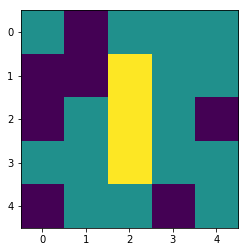

0.0


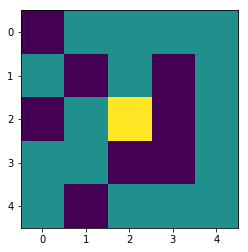

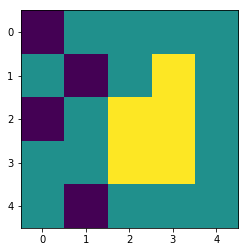

0.0


0.0

In [6]:
monte_carlo(2,5,0.4)

In [105]:
def is_empty(b,i,j):
    #up bound
    if i+1 in range(len(b)):
        if b[i+1,j] == 0:
            b[i+1,j] = 2
    #down bound
    if i-1 in range(len(b)):                           
        if b[i-1,j] == 0:
            b[i-1,j] = 2
    #right bound
    if j+1 in range(len(b)):                 
        if b[i,j+1] == 0:
            b[i,j+1] = 2                                
    #left bound
    if j-1 in range(len(b)):
        if b[i,j-1] == 0:
            b[i,j-1] = 2 
    
    return

def is_there_a_path(b,i,j):
    q = True
    if i-1 not in range(len(b)):
        if j-1 not in range(len(b)):
            if j+1 in range(len(b)):                
                if b[i+1,j] != 0:
                    if b[i,j+1] != 0:
                        return False 
                    
        if j+1 not in range(len(b)):
            if j-1 in range(len(b)):
                if b[i+1,j] != 0:
                    if b[i,j-1] != 0:
                        return False
                    
    if i+1 not in range(len(b)):
        if j-1 not in range(len(b)):
            if j+1 in range(len(b)):
                if b[i-1,j] != 0:
                    if b[i,j+1] != 0:
                        
                        return False
        
        if j+1 not in range(len(b)):
            if j-1 in range(len(b)):
                if b[i-1,j] != 0:
                    if b[i,j-1] != 0:
                        return False

    if i-1 not in range(len(b)):
        if j+1 in range(len(b)):
            if b[i+1,j] != 0:
                if b[i,j+1] != 0:
                    if b[i,j-1] != 0:
                        return False
        if j-1 in range(len(b)):
            if j+1 in range(len(b)):
                if b[i+1,j] != 0:
                    if b[i,j+1] != 0:
                        if b[i,j-1] != 0:
                            return False
                    
    if i+1 not in range(len(b)):
        if j+1 in range(len(b)):
            if b[i-1,j] != 0:
                if b[i,j+1] != 0:
                    if b[i,j-1] != 0:
                        return False
        if j-1 in range(len(b)):
            if j+1 in range(len(b)):
                if b[i-1,j] != 0:
                    if b[i,j+1] != 0:
                        if b[i,j-1] != 0:
                            return False

    if i+1 in range(len(b)):
        if i-1 in range(len(b)):                           
            if j+1 in range(len(b)):                 
                if j-1 in range(len(b)):
                    if b[i+1,j] != 0:
                        if b[i-1,j] != 0:
                            if b[i,j+1] != 0:
                                if b[i,j-1] != 0:    
                                    return False
    return q

def fill(a):
    check = []
    for i in range(len(a)):
        for j in range(len(a)):
            check.append(is_there_a_path(a,i,j))
    if False in check:
        pass
    else:
        for i in range(len(a)):
            for j in range(len(a)):
                    is_empty(a,i,j)

def percolate(a):
    if 2 in a[len(a)-1]:
        return True
    else:
        return False

In [11]:
n = 5
p = 0.5
a = grid(n,p)
print(a)
fill(a)
print(a)
print(percolate(a))

[[1 0 0 0 1]
 [0 1 0 0 0]
 [1 0 0 1 1]
 [1 0 1 0 0]
 [1 1 0 1 0]]


NameError: name 'fill' is not defined

In [75]:
def monte_carlo(samples,n, prob):
    """
    samples: number of samples (int)
    n: size of matrix  (odd int)
    prob: probability of getting 1 or 0 (0<=prob<=1)
    """
    count = 0.
    for i in range(samples):
        a = grid(n,prob)
        print(a)
        fill(a)
        print(a)
        print(percolate(a))
        if percolate(a) == True:
            count += 1
        
    return count/samples

In [77]:
monte_carlo(2,5,0.5)

[[1 1 0 0 0]
 [0 0 1 1 0]
 [0 0 1 0 0]
 [1 1 0 1 0]
 [1 0 0 1 1]]
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
[[1 1 2 2 2]
 [2 2 1 1 2]
 [2 2 1 2 2]
 [1 1 2 1 2]
 [1 2 2 1 1]]
True
[[0 1 1 0 1]
 [1 0 0 1 1]
 [1 0 1 0 0]
 [1 0 1 1 1]
 [1 1 1 0 0]]
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
[[0 1 1 0 1]
 [1 0 0 1 1]
 [1 0 1 0 0]
 [1 0 1 1 1]
 [1 1 1 0 0]]
False


0.5

In [6]:
def choose_indicies(i,j):
    x = i
    y = j
    while x == i and y == j or  (x== i+1 and y== j+1) or (x== i-1 and y== i-1):
        x = np.random.choice([i+1,i-1,i])
        y = np.random.choice([j+1,j-1,j])
    return x,y

In [6]:
a = True
while a == True:
    x = 2
    y = 2
    ind = choose_indicies(x,y)
    if ind[0] or ind[1] > 2 or ind[0] or ind[1] < 0:
        a = False
    
    else:
         if b[ind] == 0:
            a = True
            x = ind[0]
            y = ind[1]
            print(x,y)